# Project-FRA503 Machine Learning

สมาชิกทีม 

1. นายรณกร เมฆวิมานลอย 63340500051


## Data Exploration

Dataset ที่นำมาวิเคราะห์มาจาก https://www.kaggle.com/datasets/whenamancodes/predict-diabities (diabities.Csv) <br>
ชุดข้อมูลนี้ต้องการที่จะวินิจฉัยหาคนที่เป็นโรคเบาหวาน โดยวิเคราะห์จาก feature ทั้งหมด 9 feature <br>
โดยมี sample ทั้งหมด 768 คน แยก feature Outcome ออกมาเก็บในตัวแปล df_y เหลือชุดข้อมูลในการวิเคราะห์ทั้งหมด 8 feature

Explain Features
- Pregnancies คือ จำนวนการตั้งครรภ์
- Glucose คือ ระดับกลูโคสในเลือด
- BloodPressure คือ การวัดความดันโลหิต
- SkinThickness	คือ ความหนาของผิวหนัง
- Insulin คือ ระดับอินซูลินในเลือด
- BMI คือ ดัชนีมวลกาย
- DiabetesPedigreeFunction คือ เปอร์เซ็นต์เบาหวาน
- Age คือ อายุ 
- Outcome คือ class target คนที่เป็นกับไม่เป็น


In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from imblearn.over_sampling import SMOTE

df_full = pd.read_csv('diabetes.csv',sep=',')
df_full.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df_y = df_full["Outcome"]
# df.head()
print(df_full.shape)
df_full.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


ชุดข้อมูลนี้มีคนที่เป็นโรคเบาหวาน 500 คน คนที่ไม่เป็นโรคเบาหวาน 268 คน <br>
โดยชุดข้อมูลนี้ไม่มี Missing value

In [183]:
print(df_y.value_counts())
print("")
print(df_full.isnull().sum())
print(df_full.shape)

0    500
1    268
Name: Outcome, dtype: int64

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
(768, 9)


Boxplot Data

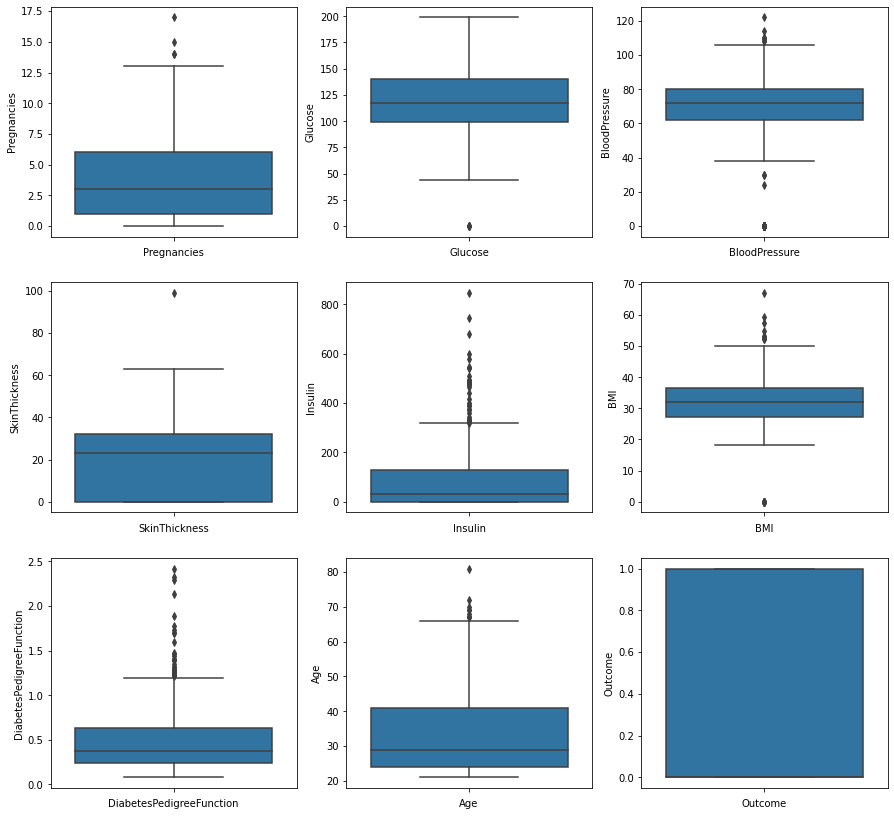

In [184]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for feature in df_full.columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y = df_full[feature],whis=1.5)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Observe
- จากภาพพบว่ามี Outlier จำนวนหนึ่งในแต่ละ feature ในส่วนของ feature insulin พบว่ามี outlier ที่มีค่าโดดสูงมาก 

Pairplot Data

In [185]:
# sns.pairplot(df_full,hue="Outcome")
Image(url="pic/Pairplot_df_full.png", width=1000, height=1000)   

Observe
- จากภาพพบว่า มีการแบ่งกลุ่มที่ชัดเจนใน feature Glucose

Plot heatmap numeric

<AxesSubplot:>

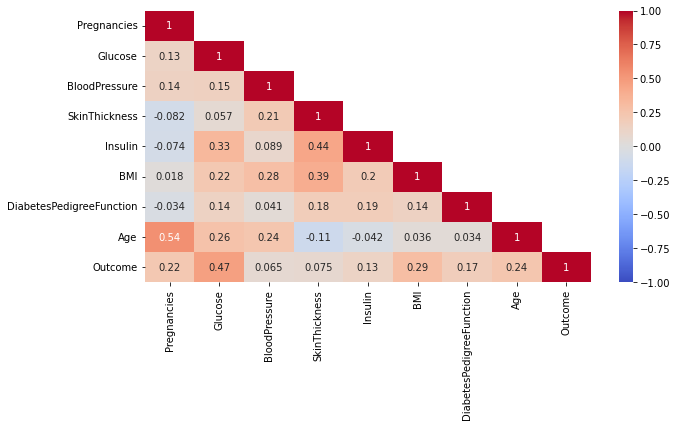

In [186]:
corr = df_full.corr()
mask = np.array(corr)
# print(corr)
mask[np.tril_indices_from(mask)] = False     
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corr,mask= mask,vmax =1,vmin = -1,annot= True,cmap= 'coolwarm')

Observe
- จากภาพพบว่า feature Glucose มีความสัมพันธ์ในเชิงบวกสูงที่สุด ตามด้วย BMI Age
- feature BloodPressure และ SkinThickness มีความสัมพันธ์ที่น้อยกว่า 0.1

## Data Preprocessing

### Remove Outlier

In [187]:
df_RMout = df_full.copy()

In [188]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [189]:
for i in df_RMout.columns:
    lr,ur=remove_outlier(df_RMout[i])
    # print(lr,ur)
    df_RMout=df_RMout[(df_RMout[i]>(lr)) & (df_RMout[i]<ur)]

In [190]:
dip = df_full.shape
print('Original data')
print('Rows : ' + str(dip[0]))
print('Columns : ' + str(dip[1]))
print('-------------------------------------------------')
dip = df_RMout.shape
print('New data')
print('Rows : ' + str(dip[0]))
print('Columns : ' + str(dip[1]))

Original data
Rows : 768
Columns : 9
-------------------------------------------------
New data
Rows : 636
Columns : 9


Observe
- จากภาพพบว่า หลังจาก Remove outlier ข้อมูลถูกตัดไป 132 ตัวเหลือ 636 ตัว

Boxplot After remove outlier

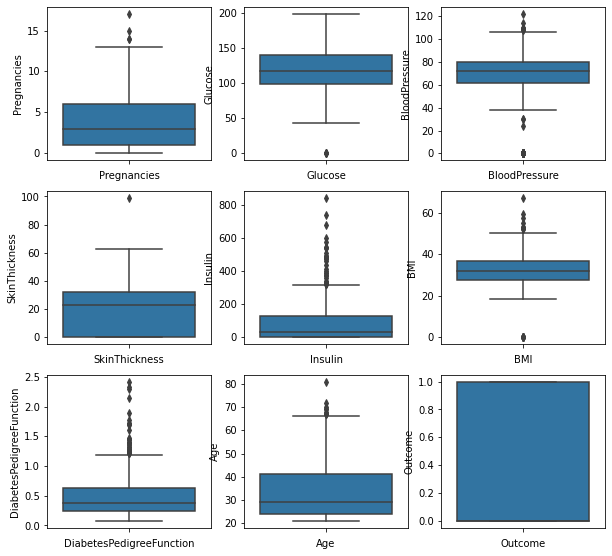

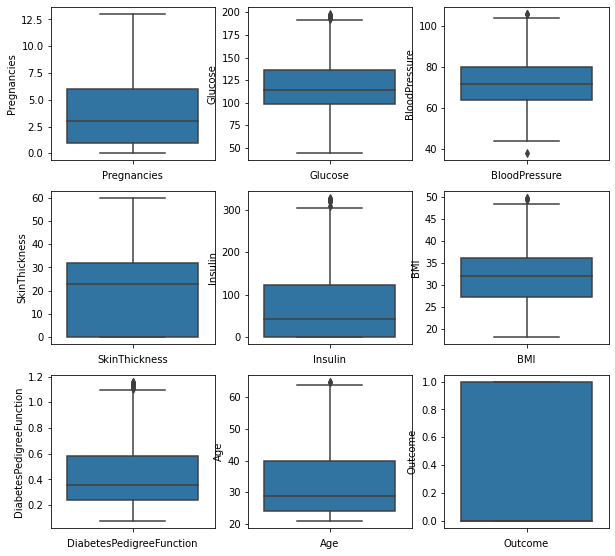

(636, 9)
0    438
1    198
Name: Outcome, dtype: int64


In [191]:

plt.figure(figsize=(10,40), facecolor='white')
plotnumber =1
for feature in df_full.columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y = df_full[feature],whis=1.5)
    plt.xlabel(feature)
    plotnumber+=1


plt.figure(figsize=(10,40), facecolor='white')
plotnumber =1
for feature in df_RMout.columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y = df_RMout[feature],whis=1.5)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()
print(df_RMout.shape)
print(df_RMout['Outcome'].value_counts())

### Feature Selection 

ตัด feature ที่ค่าความสัมพันธ์กับ class target หรือ outcome น้อยกว่า 0.1

In [192]:
df_Cut = df_RMout.drop([
    'BloodPressure',
    'SkinThickness'],axis = 1)
# print(df_Cut.columns)
print(df_Cut.shape)
print(df_Cut['Outcome'].value_counts())
# print(len(df_Cut.columns))

(636, 7)
0    438
1    198
Name: Outcome, dtype: int64


### Smote Data

In [193]:
df_y = df_Cut['Outcome']
df = df_Cut.drop(['Outcome'],axis= 1)
oversample = SMOTE()
df, df_y = oversample.fit_resample(df, df_y)
df_Smote = df.join([df_y])
print(df_Smote.shape)
print(df_y.value_counts())

(876, 7)
1    438
0    438
Name: Outcome, dtype: int64


### PCA

In [194]:
from sklearn.decomposition import PCA
def Pca_select(Data,name):
    pca = PCA(n_components = len(Data.columns))           # Create PCA transformer
    x_pca = pca.fit_transform(Data)   
    a = len(Data.columns)
    plt.figure(figsize=(40,3))
    plt.title(name)
    for i in range(a):
        # print(str(pca.explained_variance_ratio_[i])+" : "+str(df_full.columns[i]))
        plt.subplot(111)
        plt.scatter(str(i+1),pca.explained_variance_ratio_[i],color='green',marker = 'o',label='No fires')
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
    plt.show()

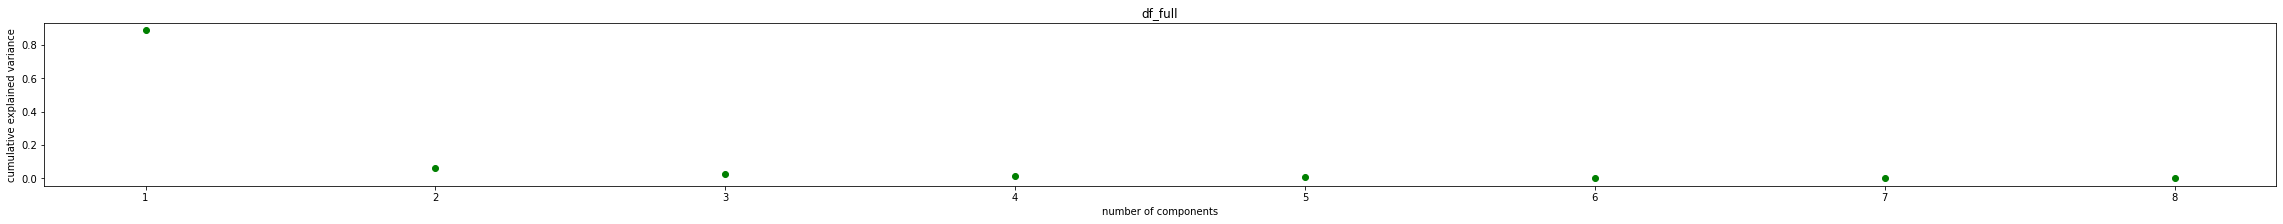

In [195]:
df_y = df_full['Outcome']
df_PCA = df_full.drop(['Outcome'],axis=1)
Pca_select(df_PCA,'df_full')

จากภาพจากทำ PCA ทำให้เลือก components เท่ากับ 3


In [196]:
pca = PCA(n_components = 3)
df_PCA = pca.fit_transform(df_PCA)
df_PCA  = pd.DataFrame(df_PCA)
df_PCA = df_PCA.join([df_y])
df_PCA.columns = ["one","two","three","Outcome"]
df_PCA.head() 

print(df_PCA.shape)
print(df_PCA['Outcome'].value_counts())

(768, 4)
0    500
1    268
Name: Outcome, dtype: int64


### MinMaxScaler df_RMout

In [197]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, QuantileTransformer
def MinMax_Data(data):
    scaler = MinMaxScaler()
    MinMax = scaler.fit_transform(data)
    # print(X)
    data = pd.DataFrame(MinMax,columns= list(data.columns))
    return data

### Train_Test_Split 

In [198]:
from sklearn.model_selection import train_test_split
def Split_Data(data):
    df_y = data['Outcome']
    df = data.drop(['Outcome'],axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(df,df_y,test_size = 0.5,random_state = 25)
    return X_train, X_test, y_train, y_test

## Model Building & Model Training

### DecisionTree

In [199]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion='entropy',max_depth= 10,random_state= 25)
model_DecisionTree 


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=25)

In [200]:
def Decision_Data(data):    
    data = MinMax_Data(data)
    print(data.shape)
    X_train, X_test, y_train, y_test = Split_Data(data)
    # train model
    model_DecisionTree.fit(X_train, y_train)
    # predict model train
    y_pred = model_DecisionTree.predict(X_train)

    # Classification report
    from sklearn.metrics import classification_report,confusion_matrix
    print("Classification report \n=======================")
    print(classification_report(y_true=y_train, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_train, y_pred=y_pred))
    # predict model test
    y_pred = model_DecisionTree.predict(X_test)
    # predict model train
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))

- df_full

In [201]:
Decision_Data(df_full)

(768, 9)
Classification report 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       247
         1.0       0.98      0.96      0.97       137

    accuracy                           0.98       384
   macro avg       0.98      0.97      0.97       384
weighted avg       0.98      0.98      0.98       384

Confusion matrix 
[[244   3]
 [  6 131]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       253
         1.0       0.58      0.50      0.53       131

    accuracy                           0.70       384
   macro avg       0.67      0.65      0.66       384
weighted avg       0.69      0.70      0.70       384

Confusion matrix 
[[205  48]
 [ 66  65]]


- df_RMout

In [202]:
Decision_Data(df_RMout)

(636, 9)
Classification report 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       216
         1.0       0.99      0.97      0.98       102

    accuracy                           0.99       318
   macro avg       0.99      0.98      0.99       318
weighted avg       0.99      0.99      0.99       318

Confusion matrix 
[[215   1]
 [  3  99]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       222
         1.0       0.59      0.50      0.54        96

    accuracy                           0.74       318
   macro avg       0.69      0.67      0.68       318
weighted avg       0.73      0.74      0.74       318

Confusion matrix 
[[188  34]
 [ 48  48]]


- df_Cut

In [203]:
Decision_Data(df_Cut)

(636, 7)
Classification report 
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       216
         1.0       0.94      0.99      0.96       102

    accuracy                           0.97       318
   macro avg       0.97      0.98      0.97       318
weighted avg       0.98      0.97      0.98       318

Confusion matrix 
[[209   7]
 [  1 101]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       222
         1.0       0.57      0.62      0.59        96

    accuracy                           0.74       318
   macro avg       0.70      0.71      0.70       318
weighted avg       0.75      0.74      0.75       318

Confusion matrix 
[[176  46]
 [ 36  60]]


- df_Smote

In [204]:
Decision_Data(df_Smote)

(876, 7)
Classification report 
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       218
         1.0       0.97      0.96      0.97       220

    accuracy                           0.97       438
   macro avg       0.97      0.97      0.97       438
weighted avg       0.97      0.97      0.97       438

Confusion matrix 
[[212   6]
 [  9 211]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78       220
         1.0       0.80      0.69      0.74       218

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.76      0.76      0.76       438

Confusion matrix 
[[182  38]
 [ 67 151]]


- df_PCA

In [205]:
Decision_Data(df_PCA)

(768, 4)
Classification report 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       247
         1.0       0.95      0.92      0.94       137

    accuracy                           0.96       384
   macro avg       0.96      0.95      0.95       384
weighted avg       0.96      0.96      0.96       384

Confusion matrix 
[[241   6]
 [ 11 126]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       253
         1.0       0.51      0.44      0.47       131

    accuracy                           0.66       384
   macro avg       0.62      0.61      0.61       384
weighted avg       0.65      0.66      0.66       384

Confusion matrix 
[[198  55]
 [ 74  57]]


### LogisticRegression

In [206]:
from sklearn.linear_model import LogisticRegression
def Logistic_Data(data):
    data = MinMax_Data(data)
    print(data.shape)
    X_train, X_test, y_train, y_test = Split_Data(data)
    model_logistic_all = LogisticRegression()
    model_logistic_all.fit(X_train,y_train)
    y_pred = model_logistic_all.predict(X_train)

    # Classification report
    from sklearn.metrics import classification_report,confusion_matrix
    print("Classification report \n=======================")
    print(classification_report(y_true=y_train, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_train, y_pred=y_pred))
    # predict model test
    y_pred = model_logistic_all.predict(X_test)
    # predict model train
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))

- df_full

In [207]:
Logistic_Data(df_full)

(768, 9)
Classification report 
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       247
         1.0       0.76      0.47      0.59       137

    accuracy                           0.76       384
   macro avg       0.76      0.70      0.71       384
weighted avg       0.76      0.76      0.74       384

Confusion matrix 
[[227  20]
 [ 72  65]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85       253
         1.0       0.78      0.56      0.65       131

    accuracy                           0.79       384
   macro avg       0.79      0.74      0.75       384
weighted avg       0.79      0.79      0.78       384

Confusion matrix 
[[232  21]
 [ 58  73]]


- df_RMout

In [208]:
Logistic_Data(df_RMout)

(636, 9)
Classification report 
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86       216
         1.0       0.77      0.54      0.64       102

    accuracy                           0.80       318
   macro avg       0.79      0.73      0.75       318
weighted avg       0.80      0.80      0.79       318

Confusion matrix 
[[200  16]
 [ 47  55]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       222
         1.0       0.71      0.43      0.53        96

    accuracy                           0.77       318
   macro avg       0.75      0.68      0.69       318
weighted avg       0.76      0.77      0.75       318

Confusion matrix 
[[205  17]
 [ 55  41]]


- df_Cut

In [209]:
Logistic_Data(df_Cut)

(636, 7)
Classification report 
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       216
         1.0       0.76      0.54      0.63       102

    accuracy                           0.80       318
   macro avg       0.79      0.73      0.75       318
weighted avg       0.79      0.80      0.79       318

Confusion matrix 
[[199  17]
 [ 47  55]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86       222
         1.0       0.73      0.43      0.54        96

    accuracy                           0.78       318
   macro avg       0.76      0.68      0.70       318
weighted avg       0.77      0.78      0.76       318

Confusion matrix 
[[207  15]
 [ 55  41]]


- df_Smote

In [210]:
Logistic_Data(df_Smote)

(876, 7)
Classification report 
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       218
         1.0       0.76      0.74      0.75       220

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438

Confusion matrix 
[[166  52]
 [ 58 162]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       220
         1.0       0.78      0.80      0.79       218

    accuracy                           0.79       438
   macro avg       0.79      0.79      0.79       438
weighted avg       0.79      0.79      0.79       438

Confusion matrix 
[[171  49]
 [ 43 175]]


- df_PCA

In [211]:
Logistic_Data(df_PCA)

(768, 4)
Classification report 
              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83       247
         1.0       0.79      0.40      0.53       137

    accuracy                           0.75       384
   macro avg       0.76      0.67      0.68       384
weighted avg       0.76      0.75      0.72       384

Confusion matrix 
[[232  15]
 [ 82  55]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83       253
         1.0       0.78      0.38      0.51       131

    accuracy                           0.75       384
   macro avg       0.76      0.66      0.67       384
weighted avg       0.76      0.75      0.72       384

Confusion matrix 
[[239  14]
 [ 81  50]]


### K_Nearest_Neighbor

In [212]:
#import machine learning library
from sklearn.neighbors import KNeighborsClassifier
def K_Nearest_Data(data):
    data = MinMax_Data(data)
    print(data.shape)
    X_train, X_test, y_train, y_test = Split_Data(data)
    knn = KNeighborsClassifier(n_neighbors=3)
    model_knn = knn.fit(X_train, y_train)
    # predict model train
    y_pred = model_knn.predict(X_train)
    from sklearn.metrics import classification_report,confusion_matrix
    # Classification report
    print("Classification report \n=======================")
    print(classification_report(y_true=y_train, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_train, y_pred=y_pred))

    # predict model test
    y_pred = model_knn.predict(X_test)
    # Classification report
    print("Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))

- df_full

In [213]:
K_Nearest_Data(df_full)

(768, 9)
Classification report 
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       247
         1.0       0.82      0.72      0.77       137

    accuracy                           0.85       384
   macro avg       0.84      0.82      0.83       384
weighted avg       0.84      0.85      0.84       384

Confusion matrix 
[[226  21]
 [ 38  99]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       253
         1.0       0.59      0.49      0.54       131

    accuracy                           0.71       384
   macro avg       0.67      0.66      0.66       384
weighted avg       0.70      0.71      0.70       384

Confusion matrix 
[[209  44]
 [ 67  64]]


- df_RMout

In [214]:
K_Nearest_Data(df_RMout)

(636, 9)
Classification report 
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       216
         1.0       0.81      0.72      0.76       102

    accuracy                           0.86       318
   macro avg       0.84      0.82      0.83       318
weighted avg       0.85      0.86      0.85       318

Confusion matrix 
[[199  17]
 [ 29  73]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       222
         1.0       0.58      0.46      0.51        96

    accuracy                           0.74       318
   macro avg       0.68      0.66      0.67       318
weighted avg       0.72      0.74      0.73       318

Confusion matrix 
[[190  32]
 [ 52  44]]


- df_Cut

In [215]:
K_Nearest_Data(df_Cut)

(636, 7)
Classification report 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       216
         1.0       0.78      0.76      0.77       102

    accuracy                           0.86       318
   macro avg       0.83      0.83      0.83       318
weighted avg       0.85      0.86      0.85       318

Confusion matrix 
[[194  22]
 [ 24  78]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       222
         1.0       0.57      0.52      0.55        96

    accuracy                           0.74       318
   macro avg       0.69      0.68      0.68       318
weighted avg       0.73      0.74      0.74       318

Confusion matrix 
[[185  37]
 [ 46  50]]


- df_Smote

In [216]:
K_Nearest_Data(df_Smote)

(876, 7)
Classification report 
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       218
         1.0       0.83      0.93      0.88       220

    accuracy                           0.87       438
   macro avg       0.87      0.87      0.87       438
weighted avg       0.87      0.87      0.87       438

Confusion matrix 
[[176  42]
 [ 16 204]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       220
         1.0       0.75      0.83      0.78       218

    accuracy                           0.77       438
   macro avg       0.78      0.77      0.77       438
weighted avg       0.78      0.77      0.77       438

Confusion matrix 
[[159  61]
 [ 38 180]]


- df_PCA

In [217]:
K_Nearest_Data(df_PCA)

(768, 4)
Classification report 
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       247
         1.0       0.78      0.69      0.73       137

    accuracy                           0.82       384
   macro avg       0.81      0.79      0.80       384
weighted avg       0.82      0.82      0.82       384

Confusion matrix 
[[221  26]
 [ 43  94]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       253
         1.0       0.57      0.51      0.54       131

    accuracy                           0.70       384
   macro avg       0.66      0.65      0.66       384
weighted avg       0.69      0.70      0.70       384

Confusion matrix 
[[202  51]
 [ 64  67]]
